In [1]:
import numpy as np
import pandas as pd

In [2]:
spotify_train = pd.read_csv('CS98XClassificationTrain.csv')
spotify_test = pd.read_csv('CS98XClassificationTest.csv')

In [3]:
spotify_train.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [4]:
spotify_test.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44


In [5]:
spotify_train.isna().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [6]:
spotify_train.dropna(inplace=True)

In [7]:
spotify_train['artist'].value_counts()

Elton John     9
Queen          7
ABBA           7
The Beatles    6
Rihanna        5
              ..
Paul Young     1
Keri Hilson    1
Four Tops      1
La Bouche      1
*NSYNC         1
Name: artist, Length: 331, dtype: int64

In [8]:
spotify_train['title'].value_counts()

Please Mr. Postman                             2
Take Good Care Of My Baby - 1990 Remastered    2
My Happiness                                   1
Guilty (feat. Barry Gibb)                      1
Where Is The Love?                             1
                                              ..
I Think We're Alone Now                        1
Lollipop                                       1
Radio Ga Ga - 2011 Mix                         1
Daddy Cool                                     1
In The Army Now                                1
Name: title, Length: 436, dtype: int64

In [9]:
spotify_train['top genre'].value_counts()

adult standards       68
album rock            66
dance pop             61
brill building pop    16
glam rock             16
                      ..
bow pop                1
australian rock        1
boogaloo               1
british comedy         1
alternative rock       1
Name: top genre, Length: 86, dtype: int64

In [10]:
spotify_train = spotify_train.drop('Id',axis=1)
spotify_train = spotify_train.drop('title',axis=1)
spotify_train = spotify_train.drop('artist',axis=1)

/Users/tahniasabah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bpm', ylabel='Density'>

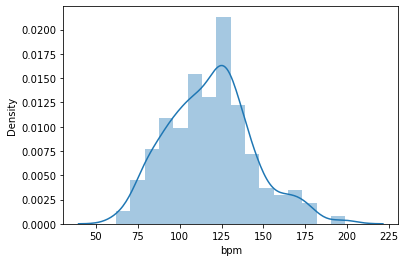

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(spotify_train['bpm'])

/Users/tahniasabah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nrgy', ylabel='Density'>

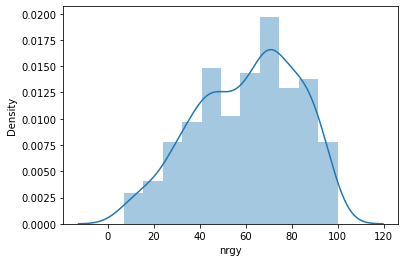

In [12]:
sns.distplot(spotify_train['nrgy'])

/Users/tahniasabah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dnce', ylabel='Density'>

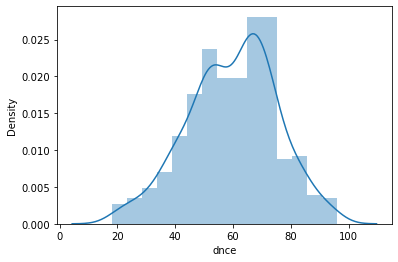

In [13]:
sns.distplot(spotify_train['dnce'])

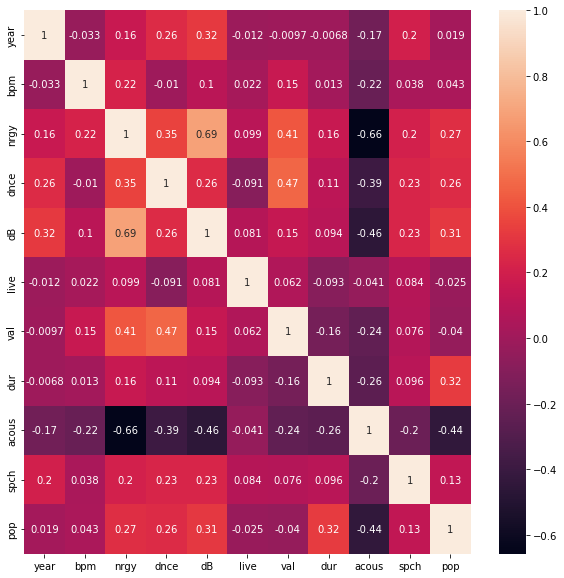

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(spotify_train.corr(),annot=True)
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
spotify_train['top genre'] = label_enc.fit_transform(spotify_train['top genre'])

In [16]:
spotify_train.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1996,107,31,45,-8,13,28,150,75,3,44,1
2,1979,105,36,63,-9,13,67,245,11,3,77,1
3,1980,170,28,47,-16,13,33,232,25,3,67,1
4,1973,121,47,56,-8,15,40,193,45,3,63,68
5,2010,110,56,71,-7,12,23,223,15,6,74,80


In [17]:
X = spotify_train.iloc[:,:-1]
y = spotify_train.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

 **Logisitic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression
logisticregression = LogisticRegression(multi_class='ovr')
logisticregression.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

**Support Vector Classifer**

In [21]:
from sklearn.svm import SVC
Supportvector = SVC(degree=5,kernel= "rbf" )
Supportvector.fit(X_train,y_train)

SVC(degree=5)

**Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeClassifier
Decisiontree = DecisionTreeClassifier(random_state=42,min_samples_split=2, min_samples_leaf=2,max_depth=5,max_features= 5)
Decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2,
                       random_state=42)

**Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier
Randomforest = RandomForestClassifier(random_state=42,min_samples_split=3, min_samples_leaf=3,max_depth=10)
Randomforest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=3,
                       random_state=42)

**Voting Classifier**

In [24]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[('logisticregression', logisticregression),('Supportvector', Supportvector),('Decisiontree',Decisiontree),('Randomforest', Randomforest)],voting='hard')
voting_classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('logisticregression',
                              LogisticRegression(multi_class='ovr')),
                             ('Supportvector', SVC(degree=5)),
                             ('Decisiontree',
                              DecisionTreeClassifier(max_depth=5,
                                                     max_features=5,
                                                     min_samples_leaf=2,
                                                     random_state=42)),
                             ('Randomforest',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=3,
                                                     min_samples_split=3,
                                                     random_state=42))])

In [25]:
from sklearn.metrics import accuracy_score
for classifier in (logisticregression,Supportvector, Decisiontree,Randomforest, voting_classifier):
    classifier.fit(X_train, y_train)
    ypred = classifier.predict(X_test)
    print(classifier.__class__.__name__, accuracy_score(y_test, ypred))

LogisticRegression 0.3181818181818182
SVC 0.3484848484848485
DecisionTreeClassifier 0.21212121212121213
RandomForestClassifier 0.32575757575757575
VotingClassifier 0.3409090909090909


In [26]:
Id = spotify_test.iloc[:,0].values
spotify_test

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,563,Candy Shop,50 Cent,2005,125,57,61,-8,38,76,209,3,47,78
109,564,Dragostea Din Tei - Italian Version,O-Zone,2010,130,89,67,-6,10,80,215,4,3,44
110,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,1994,84,58,78,-7,14,76,253,43,27,74
111,566,YMCA - Original Version 1978,Village People,1978,127,97,72,-5,12,73,287,6,14,71


In [27]:
spotify_test = spotify_test.drop('Id',axis=1)
spotify_test = spotify_test.drop('title',axis=1)
spotify_test = spotify_test.drop('artist',axis=1)

In [28]:
spotify_test= spotify_test.iloc[:,:].values
spotify_test = standard_scaler.transform(spotify_test)

In [29]:
Result = pd.DataFrame()
Result['Id']= Id
Result['top genre'] = pd.DataFrame(label_enc.inverse_transform(voting_classifier.predict(spotify_test)))
Result.to_csv('Result.csv', index= False)